# DataFrame Injector Demo

In [1]:
import sys
import os
import pandas as pd

# Add the repo root to sys.path
repo_root = os.path.abspath("..")
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

from fault_injector.generate_data import DataGen
from fault_injector.injector import Injector
from fault_injector.df_injector import DataFrameInjector
from fault_injector.fault_lib import *
import numpy as np
import matplotlib.pyplot as plt

## Starting Data

Column name: col_a


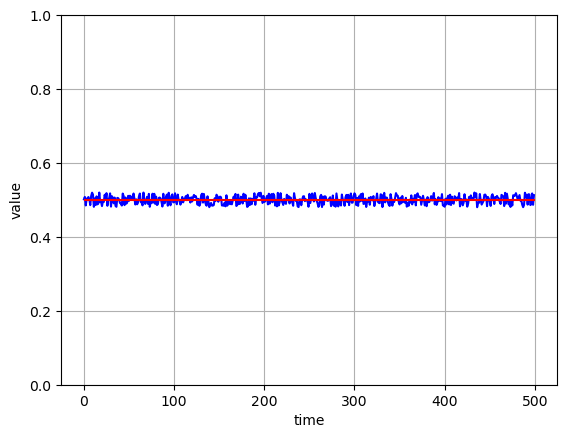

Column name: col_b


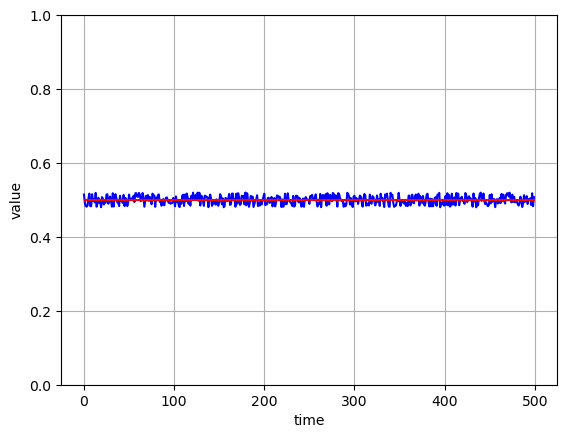

Column name: col_c


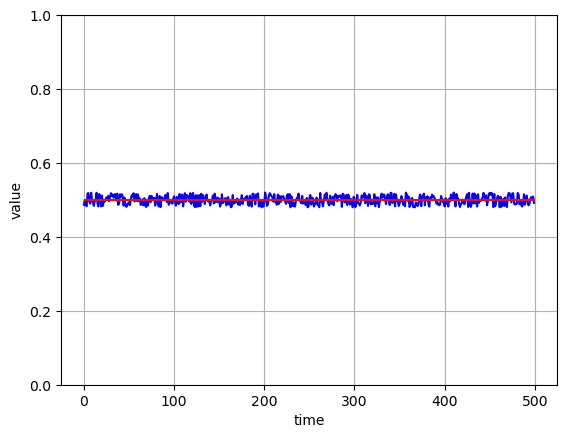

Column name: col_d


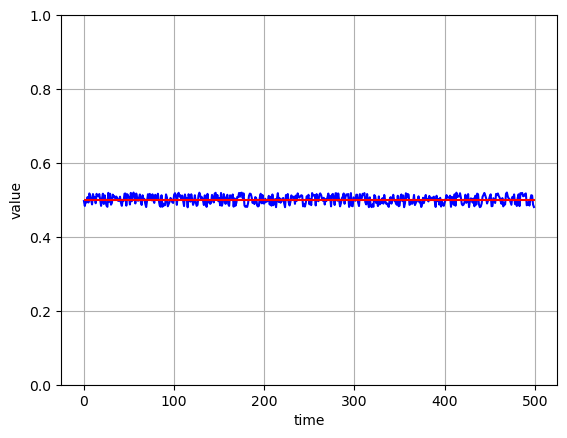

Column name: col_e


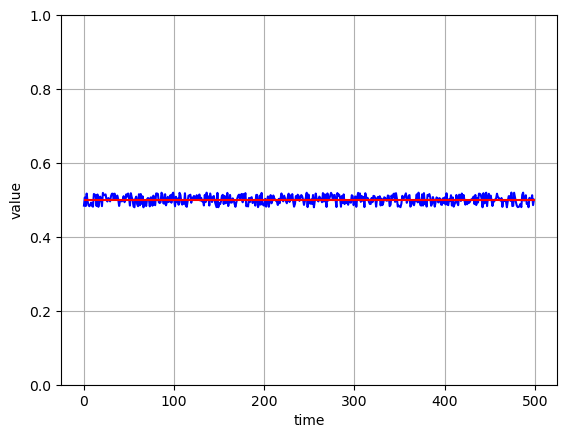

In [2]:
rand_max = 0.52
rand_min = 0.48
size = 500

df = pd.DataFrame()
for i in ['a','b','c','d','e']:
    col_name = f'col_{i}'
    print(f'Column name: {col_name}')

    # create class object
    gen_obj = DataGen(rand_max, rand_min, size)

    # generate synthetic data
    gen_obj.random_gen()
    df[col_name] = np.array(gen_obj.values)
    gen_obj.plot_values()

In [3]:
df.head()

,col_a,col_b,col_c,col_d,col_e
0,0.501602,0.514546,0.486852,0.496855,0.484571
1,0.508143,0.492377,0.499935,0.483784,0.506722
2,0.485064,0.483039,0.486107,0.499638,0.483460
3,0.502641,0.481795,0.482723,0.493149,0.517194
4,0.505075,0.484751,0.517454,0.507777,0.497021


## Define Faults

In [4]:
fault_params = {"drift_rate": 0.0001}
drift_fault_obj = DriftFault(params=fault_params)

fault_params = {"stuck_val": 0.51}
stuck_fault_obj = StuckValueFault(params=fault_params)

## Define Injectors
Note: `col_d` gets the same injector as `col_c`

In [5]:
# injector_a -> range: 100 to 400, drift fault
injector_params = {"start":100,
                   "stop": 400}
injector_object_a = Injector(fault=drift_fault_obj,
                           params=injector_params)

# injector_b -> range: 100 to 400, stuck value fault
injector_object_b = Injector(fault=stuck_fault_obj,
                           params=injector_params)

# injector_c -> range: 200 to 300, drift fault
injector_params = {"start":200,
                   "stop": 300}
injector_object_c = Injector(fault=drift_fault_obj,
                           params=injector_params)

injector_dict = {
                    "col_a": injector_object_a,
                    "col_b": injector_object_b,
                    "col_c": injector_object_c,
                    "col_d": injector_object_c,
                }

df_injector_object = DataFrameInjector(injector_dict=injector_dict)

## Inject Fault
Note: `col_e` does not get a fault injected into it

In [6]:
new_values = df_injector_object.inject_faults(df=df)

## Compare Original to New Values

In [7]:
def plot_comparison(original_values, new_values):
    fig, ax = plt.subplots(figsize=(10, 4))

    # plot original (blue)
    ax.plot(original_values, color='blue', label="Original")

    # plot new values (red)
    ax.plot(new_values, color='red', label="New Values")

    # axis labels
    ax.set(xlabel="time", ylabel="value")

    # dynamic y-limit
    ymin = min(min(original_values), min(new_values)) * 0.995
    ymax = max(max(original_values), max(new_values)) * 1.005
    ax.set_ylim([ymin, ymax])

    ax.grid()
    ax.legend()
    plt.tight_layout()
    plt.show()

## Col_A
- Fault Type: drift
- Fault Range: 100:400
- Injector object: a

## Col_B
- Fault Type: stuck value
- Fault Range: 100:400
- Injector object: b

## Col_C
- Fault Type: drift
- Fault Range: 200:300
- Injector object: c

## Col_D
- Fault Type: drift
- Fault Range: 200:300
- Injector object: c

## Col_E
- Fault Type: None
- Fault Range: None
- Injector object: None

Column: col_a


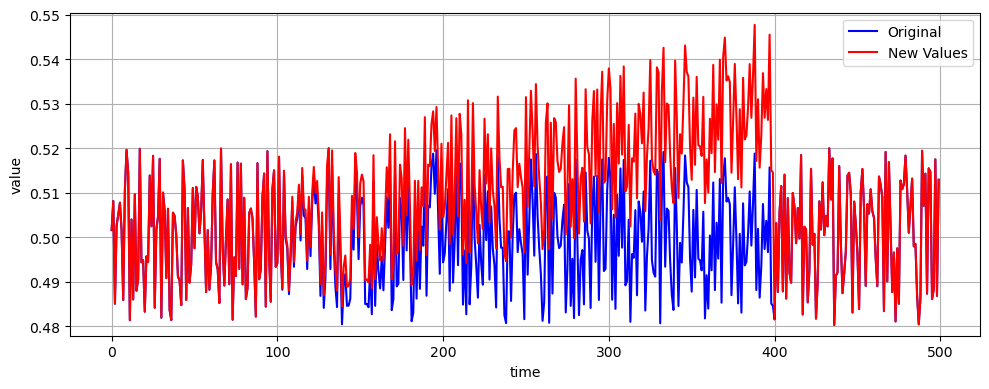

Column: col_b


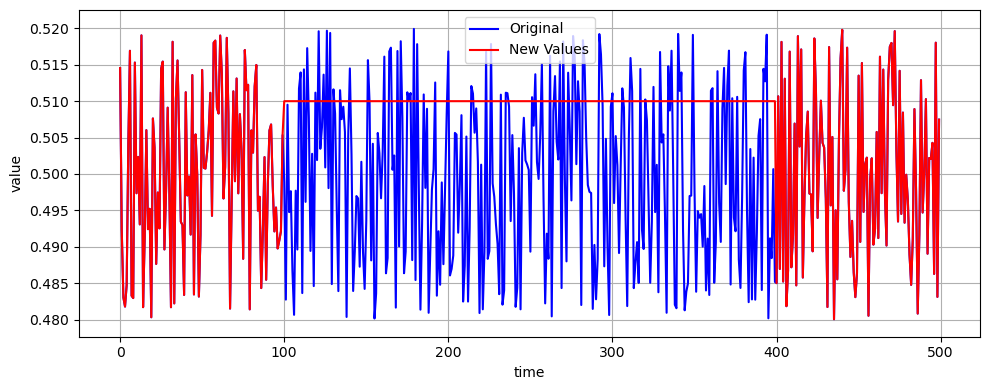

Column: col_c


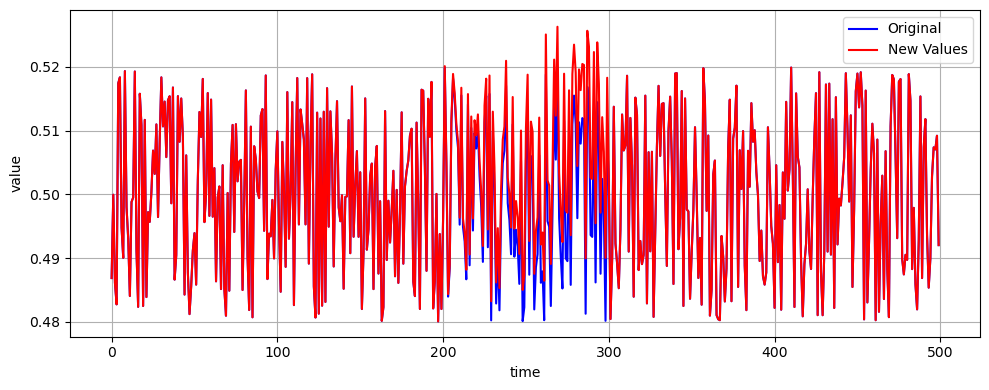

Column: col_d


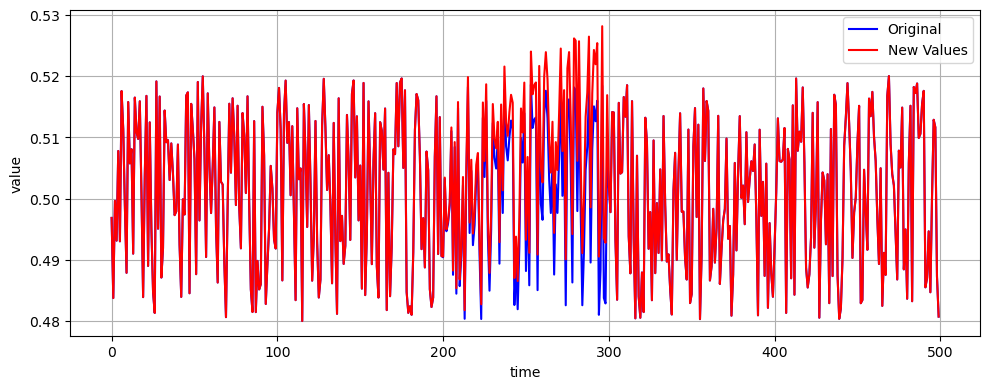

Column: col_e


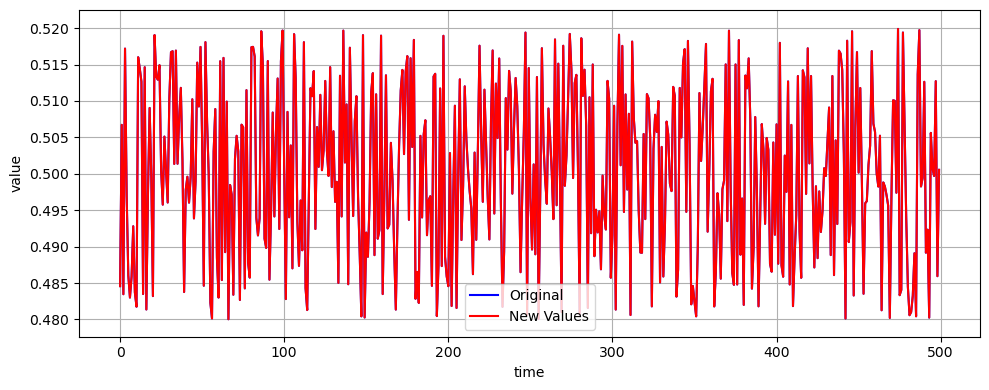

In [8]:
for key in df.keys():
    print(f'Column: {key}')
    plot_comparison(df[key], new_values[key])